In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Lo primero que hago es importar todas las bibliotecas que vamos a necesitar y fijar la semilla a un número para que los resultados con factores aleatorios sean reproducibles

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


###############################################################################
# Fijo la semilla a un valor para que cuando rellene la matriz siempre salgan
# los mismos numeros
np.random.seed(1)

EJERCICIO 1:

Ejercicio 1


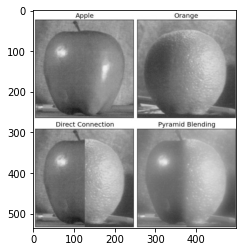

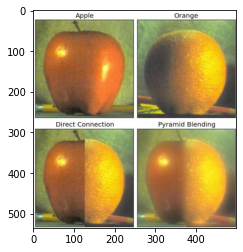

In [10]:
# Ejercicio 1.- Escribir una función que lea el fichero de una imagen y
# permita mostrarla tanto en grises como en color
def leeimagen(filename, flagColor):
    img = cv.imread(filename,flagColor)
    
    return img
    

def mostrarimagen(imagen):
    #Comprobamos si la imagen es tribanda
    if imagen.ndim == 3 and imagen.shape[2] >= 3:
        # Si es tribanda tenemos que recorrer la representación
        # BGR al revés para que sea RGB
        plt.imshow(imagen[:,:,::-1])
        plt.show()
    else:
        # Si es monobonda se lo indicamos a matplotlib
        plt.imshow(imagen,cmap='gray')
        plt.show()

print ("Ejercicio 1")


# Pintamos la imagen en escala de grises
flagColor = 0
imagen1 = leeimagen("./drive/My Drive/Colab Notebooks/images/orapple.jpg",flagColor)
mostrarimagen(imagen1)

# Pintamos la imagen en color
flagColor = 1
imagen = leeimagen("./drive/My Drive/Colab Notebooks/images/orapple.jpg",flagColor)
mostrarimagen(imagen)

Ejercicio 2

Ejercicio 2


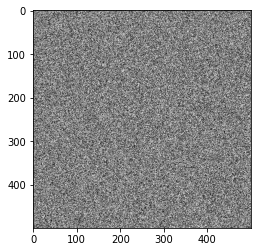

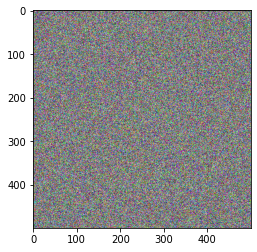

In [11]:
print("Ejercicio 2")
# Ejercicio 2.- Escribir una función que permita visualizar una
# matriz de números reales arbitraria tanto monobanda como tribanda

def convertirtribanda (imagen):
    imagen_resultado = imagen.copy()

    # Si la imagen es monobanda la convertimos a tribanda creando dos copias apiladas
    # apiladas de la imagen
    if imagen_resultado.ndim != 3 or imagen_resultado.shape[2] < 3:
        imagen_resultado = np.dstack((imagen_resultado, np.copy(imagen)))
        imagen_resultado = np.dstack((imagen_resultado, np.copy(imagen)))
    
    return imagen_resultado

def normalizarmatriz(imagen):
    # Convertimos la imagen a tribanda si esta no lo es
    img_normalizada = convertirtribanda(imagen).astype(float)
    
    # Normalizamos cada canal de la imagen
    for canal in (0,1,2):
        # Obtenemos el minimo y el maximo de cada canal
        minimo = np.min(img_normalizada.transpose(2,0,1)[canal])
        maximo = np.max(img_normalizada.transpose(2,0,1)[canal])
        
        # Comprobamos si dividimos por 0, si no, normalizamos restando el minimo y diviendiendo entre la
        # diferencia entre maximo y minimo y si sí simplemente restamos el minimo sin dividir
        if maximo - minimo != 0:
            img_normalizada.transpose(2,0,1)[canal] = (img_normalizada.transpose(2,0,1)[canal] - minimo) / (maximo - minimo)
        else:
            img_normalizada.transpose(2,0,1)[canal] = img_normalizada.transpose(2,0,1)[canal] - minimo

    return img_normalizada

def pintaI(imagen):
    matriz_normalizada = normalizarmatriz(imagen)
    mostrarimagen(matriz_normalizada)
    
    
# Creo una matriz aleatoria monobanda
matriz = np.random.randint(low=-200,high=500,size=(500,500))
pintaI(matriz)

# Creo una matriz aleatoria multibanda
matriz = np.random.randint(low=-200,high=500,size=(500,500,3))
pintaI(matriz)

Ejercicio 3

Ejercicio 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


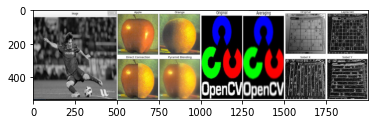

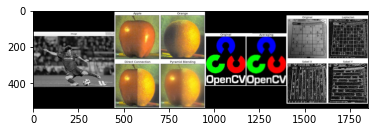

In [12]:
print("Ejercicio 3")
#Ejercicio 3.- Escribir una función que visualice varias imágenes distintas a la
# vez

################################################################################
def pintMI (vim):
    # Las imagenes que sean monobanda las vamos a convertir en tribanda
    # Para ello vamos a recorrer la lista y vamos a comprobar si alguna imagen
    # es monobanda, si lo es simplemente le vamos a agregar en profundidad dos
    # veces la misma matriz.
    for i in range(len(vim)):
        vim[i] = convertirtribanda(vim[i]).astype(float)
    
    # Vamos a escalar las imagenes para que todas tengan el mismo tamaño que la
    # primera imagen de la lista
    
    # Guardamos las dimensiones maximas de las fotos (la altura maxima de todas
    # las fotos y la anchura maxima de todas las fotos)
    anchuras = []
    alturas = []
    for i in range(len(vim)):
        alturas.append(vim[i].shape[0])
        anchuras.append(vim[i].shape[1])
    
    # Ahora buscamos la maxima de ambas y esa será las dimensiones de nuestras
    # imagenes
    alt_max = np.max(alturas)
    anch_max = np.max(anchuras)
    dim = (anch_max,alt_max)
    
    # Recorremos la lista y ponemos todas las imagenes con la misma dimensión
    for i in range(len(vim)):
        vim[i] = cv.resize(vim[i],dim)
        
    # Concatenamos las imagenes y las mostramos    
    imagen = cv.hconcat(vim)
    mostrarimagen(imagen)

############################################################################
    

def pintaMIZP (vim):
    # Almacenamos las alturas de todas las imágenes
    alturas = []
    for i in range(len(vim)):
        alturas.append(vim[i].shape[0])
        
    #Calculamos el máximo de las alturas
    max_alt = np.max(alturas)
    
    #convertimos a tribanda la primera imagen si hace falta
    img_resultado = convertirtribanda(vim[0])
    
    # si su altura no alcanza la altura maxima entramos
    if img_resultado.shape[0] < max_alt:
        # Calculamos la diferencia entre la altura maxima y la altura de la imágen
        # y la dividimos entre 2 para tener una franja negra arriba y abajo
        # además también almacenamos el resto por si no es divisible entre 2
        anc_franja = (max_alt - vim[0].shape[0]) // 2
        anch_extra = (max_alt - vim[0].shape[0]) % 2
        
        # creamos las dos franjas con las dimensiones recientemente calculadas
        franja_sup = np.zeros( (anc_franja + anch_extra, vim[0].shape[1]) )
        franja_inf = np.zeros( (anc_franja, vim[0].shape[1]) )
        
        # Convertimos las franjas a tribanda
        franja_sup = convertirtribanda(franja_sup)
        franja_inf = convertirtribanda(franja_inf)
        
        # Y las insertamos en la imagen anterior
        im_franja_arriba = np.vstack((franja_sup, img_resultado))
        img_resultado = np.vstack((im_franja_arriba, franja_inf))

    # Repetimos el mismo proceso pero para todas las imagenes
    for i in range (1,len(vim)):
        img_zeropad = convertirtribanda(vim[i])
        
        if vim[i].shape[0] < max_alt:
            anc_franja = (max_alt - vim[i].shape[0]) // 2
            anch_extra = (max_alt - vim[i].shape[0]) % 2
        
            tupla = (anc_franja + anch_extra, vim[i].shape[1])
            franja_sup = np.zeros(tupla)
            tupla = (anc_franja, vim[i].shape[1])
            franja_inf = np.zeros(tupla)
            
            franja_sup = convertirtribanda(franja_sup)
            franja_inf = convertirtribanda(franja_inf)

            im_franja_arriba = np.vstack((franja_sup, img_zeropad))
            img_zeropad = np.vstack((im_franja_arriba, franja_inf))
        
        # Vamos añadiendo imágenes horizontalmente para concatenarlas
        img_resultado = np.hstack((img_resultado, img_zeropad ))
            
    # Mostramos la imagen y salimos
    mostrarimagen(img_resultado)

imagenes = []
  
# Leo todas las imagenes para concateneralas todas en una (las leo todas en color)
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/messi.jpg",flagColor))
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/orapple.jpg",flagColor))
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/logoOpenCV.jpg",flagColor))
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/dave.jpg",flagColor))

for i in range( len(imagenes) ):
    imagenes[i] = normalizarmatriz(imagenes[i])

# LLamo a la función para que concatene la lista de imagenes y la muestre
pintMI(imagenes)

# Llamo a la función para que concatene la lista de imágenes y la muestre versión zero-padding
imagenes = []
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/messi.jpg",0))
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/orapple.jpg",flagColor))
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/logoOpenCV.jpg",flagColor))
imagenes.append(leeimagen("./drive/My Drive/Colab Notebooks/images/dave.jpg",flagColor))

for i in range( len(imagenes) ):
    imagenes[i] = normalizarmatriz(imagenes[i])
    
pintaMIZP(imagenes)

Ejercicio 4

Ejercicio 4


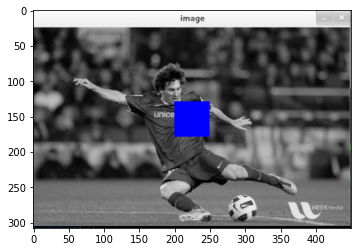

In [16]:

print("Ejercicio 4")

#################################################################################################################################
# Estas funciones son de ejercicios anteriores pero las necesitamos para este también
def convertirtribanda (imagen):
    imagen_resultado = imagen.copy()

    # Si la imagen es monobanda la convertimos a tribanda creando dos copias apiladas
    # apiladas de la imagen
    if imagen_resultado.ndim != 3 or imagen_resultado.shape[2] < 3:
        imagen_resultado = np.dstack((imagen_resultado, np.copy(imagen)))
        imagen_resultado = np.dstack((imagen_resultado, np.copy(imagen)))
    
    return imagen_resultado

def normalizarmatriz(imagen):
    # Convertimos la imagen a tribanda si esta no lo es
    img_normalizada = convertirtribanda(imagen).astype(float)
    
    # Normalizamos cada canal de la imagen
    for canal in (0,1,2):
        # Obtenemos el minimo y el maximo de cada canal
        minimo = np.min(img_normalizada.transpose(2,0,1)[canal])
        maximo = np.max(img_normalizada.transpose(2,0,1)[canal])
        
        # Comprobamos si dividimos por 0, si no, normalizamos restando el minimo y diviendiendo entre la
        # diferencia entre maximo y minimo y si sí simplemente restamos el minimo sin dividir
        if maximo - minimo != 0:
            img_normalizada.transpose(2,0,1)[canal] = (img_normalizada.transpose(2,0,1)[canal] - minimo) / (maximo - minimo)
        else:
            img_normalizada.transpose(2,0,1)[canal] = img_normalizada.transpose(2,0,1)[canal] - minimo

    return img_normalizada

#################################################################################################################################


# Escribir una función que modifique el color en la imagen
# de cada uno de los elementos de una lista de coordenadas
# de pixeles

def modificacolor(imagen, coordenadas, color):
    resultado = imagen.copy()
    
    for coordenada in coordenadas:
        x,y = coordenada
    
        resultado[y,x] = color
        
    return resultado


imagen = leeimagen("./drive/My Drive/Colab Notebooks/images/messi.jpg",flagColor)
imagen = normalizarmatriz(imagen)

coordenadas = []

centro = (imagen.shape[0] // 2) -25, (imagen.shape[1] // 2) - 25

for i in range(0,50):
    for j in range(0,50):
       coordenadas.append([i+centro[1],j+centro[0]])
                        
imagen_nueva = modificacolor(imagen,coordenadas,[1,0,0])
mostrarimagen(imagen_nueva)

Ejercicio 5

Ejercicio 5


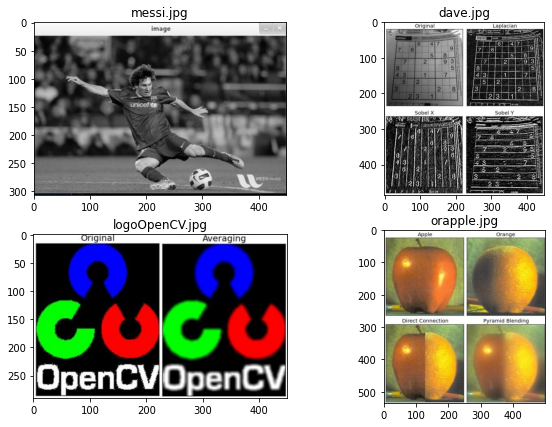

In [19]:
print ("Ejercicio 5")

# Visualizar las imágenes dentro de la misma ventana junto con el título
# correspondiente


imagen1 = leeimagen("./drive/My Drive/Colab Notebooks/images/messi.jpg",1)
imagen2 = leeimagen("./drive/My Drive/Colab Notebooks/images/dave.jpg",1)
imagen3 = leeimagen("./drive/My Drive/Colab Notebooks/images/logoOpenCV.jpg",1)
imagen4 = leeimagen("./drive/My Drive/Colab Notebooks/images/orapple.jpg",1)

fig = plt.figure(figsize=(10,7))

rows = 2
columns = 2

fig.add_subplot(rows,columns,1)

plt.imshow(imagen1[:,:,::-1])
plt.title('messi.jpg')

fig.add_subplot(rows,columns,2)

plt.imshow(imagen2[:,:,::-1])
plt.title('dave.jpg')

fig.add_subplot(rows,columns,3)

plt.imshow(imagen3[:,:,::-1])
plt.title('logoOpenCV.jpg')

fig.add_subplot(rows,columns,4)

plt.imshow(imagen4[:,:,::-1])
plt.title('orapple.jpg')

plt.show()